In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sqlalchemy
from scipy.stats import ttest_ind
import scipy .stats as stats
warnings.filterwarnings('ignore')

In [3]:
from sqlalchemy import create_engine
from sqlalchemy.engine import URL

connection_url = URL.create(
    "mssql+pyodbc",
    host="LAPTOP-MJSKGTL4\\SQLEXPRESS",
    database="Inventory",
    query={
        "driver": "ODBC Driver 17 for SQL Server",
        "trusted_connection": "yes"
    }
)

engine = create_engine(connection_url)



In [55]:
df = pd.read_sql_query("select * from new_vendor_sales_summary",engine)

In [56]:
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesPrice,TotalDollars,TotalExciseTax,FreightCOst,GrossProfit,ProfitMargin,StockTurnover,SalesToPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,672819.31,5101919.51,260999.20,68601.68,1290667.91,25.30,0.98,1.34
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,561512.37,4819073.49,294438.66,144929.24,1015032.27,21.06,0.98,1.27
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,461140.15,4538120.60,343854.07,123780.22,1119816.92,24.68,1.00,1.33
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.95,200412.0,420050.01,4475972.88,368242.80,257032.07,1214774.93,27.14,0.99,1.37
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023205.99,135838.0,545778.28,4223107.62,249587.83,257032.07,1199901.63,28.41,0.98,1.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750.0,2,2.64,5.0,10.96,15.95,0.55,27100.41,13.31,83.45,2.50,6.04
10688,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,6,2.34,134.0,1.47,65.66,7.04,50293.62,63.32,96.44,22.33,28.06
10689,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,50.0,2,1.48,2.0,0.99,1.98,0.10,14069.87,0.50,25.25,1.00,1.34
10690,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200.0,1,1.47,72.0,77.61,143.28,15.12,257032.07,141.81,98.97,72.00,97.47


# Exploratory Data Analysis
- previously, we eamined various tables in the database to identify key variables, understand their relationship and which one should be included in final analysis.

- in this pahse of EDA we will analyze the resultant table to gain the insights into distribution of each column. This will help us to understand data patterns,identify anomalies and ensure data quality before proceding with furthur analysis.

In [5]:
#statistic summaru
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10692.0,10650.649458,18753.519148,2.00,3951.0000,7153.000,9552.0000,201359.00
Brand,10692.0,18039.228769,12662.187074,58.00,5793.5000,18761.500,25514.2500,90631.00
PurchasePrice,10692.0,24.385303,109.269375,0.36,6.8400,10.455,19.4825,5681.81
ActualPrice,10692.0,35.643671,148.246016,0.49,10.9900,15.990,28.9900,7499.99
Volume,10692.0,847.360550,664.309212,50.00,750.0000,750.000,750.0000,20000.00
TotalPurchaseQantity,10692.0,3140.886831,11095.086769,1.00,36.0000,262.000,1975.7500,337660.00
TotalPurchaseDollars,10692.0,30106.693362,123067.799593,0.71,453.4575,3655.465,20738.2450,3811251.60
TotalSalesQuantity,10692.0,3077.482136,10952.851391,0.00,33.0000,261.000,1929.2500,334939.00
TotalSalesPrice,10692.0,18793.783627,44952.773386,0.00,289.7100,2857.800,16059.5625,672819.31
TotalDollars,10692.0,42239.074419,167655.265984,0.00,729.2200,5298.045,28396.9150,5101919.51


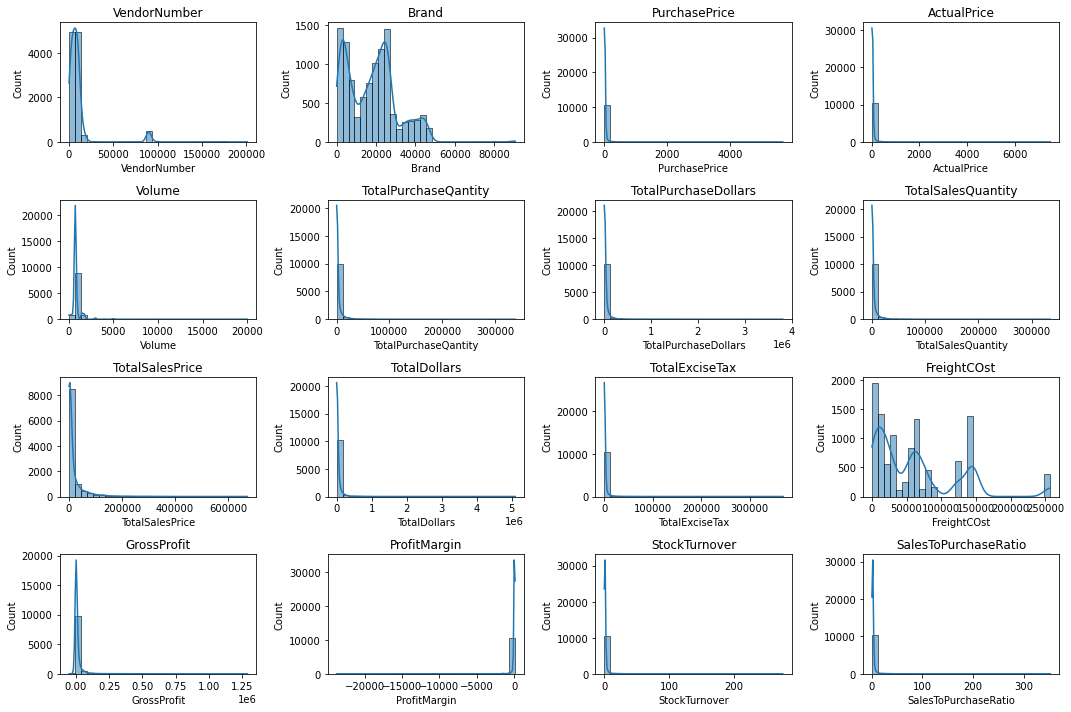

In [6]:
import numpy as np
numerical_cols = df.select_dtypes(include = np.number).columns

plt.figure(figsize=(15,10))
for i,col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)
    sns.histplot(df[col],kde = True, bins = 30)
    plt.title(col)
plt.tight_layout()
plt.show()

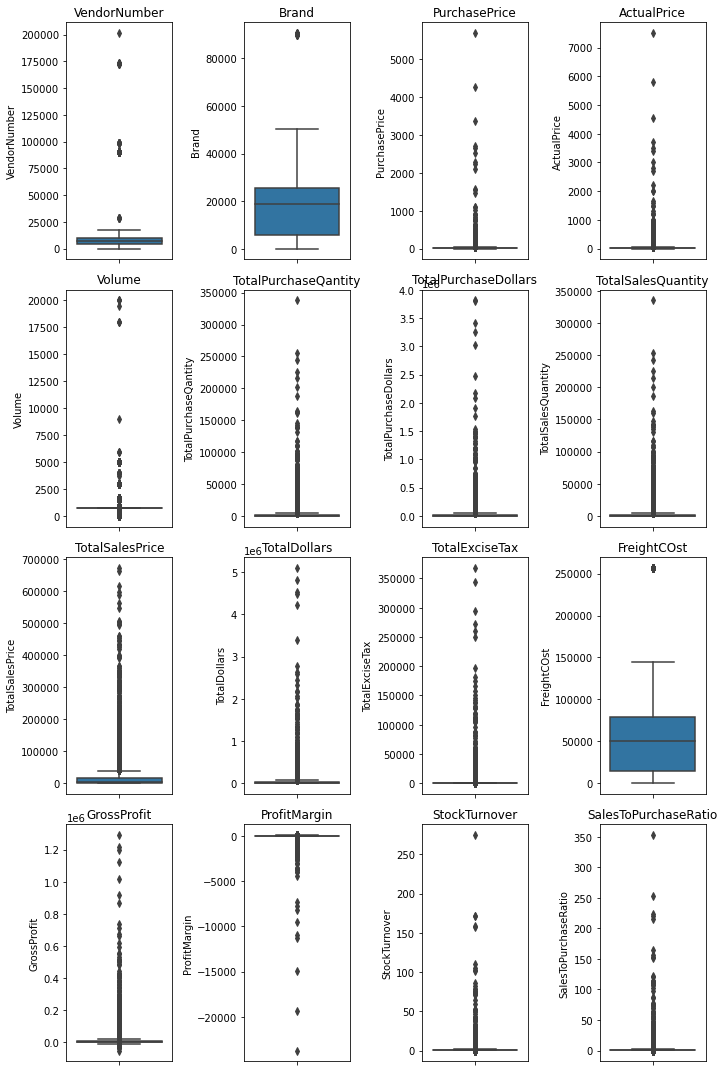

In [7]:

plt.figure(figsize=(10,15))
for i ,col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)
    sns.boxplot(y = df[col])
    plt.title(col)
    
plt.tight_layout()
plt.show()

# Summary Statistics Insight

**Negative and zero values**
- Gross Profit: Minimum values is -52,002.78,indicating losses. some product or transactions may be selling at a loss due to high cost or selling at a loss due to high cost or selling at discount than the purchase price.
- Total Sales Quantity & Sales Dollars(Total Dollars): Minimum values are 0, meaning some products were purchased but never sold. This could be slow moving or obsolete stock.

**Outliers indicated by High Standard deviation**
- Purchases and Actual Prices: The max values(5,681.81 & &,499.99) are significantly higher than the mean (24.39,35.64) indicatong potential premium products
- Freight Cost: Huge variation from 0.09 to 257,032.07, suggest logistic inefficiencies or bulk shipments.
- Stock Turnover: Ranges from 0 to 274.5, implying some products sell extremly fast while other remains in stock indefinetly. Value more than 1 indicates that sold quantity for that product is higher than purchased quantity due to either sales are being fullfilled from older stock.
  

In [8]:
df = pd.read_sql_query("""Select * from new_vendor_sales_summary
where GrossProfit>0
and ProfitMargin>0
and TotalSalesQuantity>0""",engine)

In [9]:
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesPrice,TotalDollars,TotalExciseTax,FreightCOst,GrossProfit,ProfitMargin,StockTurnover,SalesToPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,672819.31,5101919.51,260999.20,68601.68,1290667.91,25.30,0.98,1.34
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,561512.37,4819073.49,294438.66,144929.24,1015032.27,21.06,0.98,1.27
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,461140.15,4538120.60,343854.07,123780.22,1119816.92,24.68,1.00,1.33
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.95,200412.0,420050.01,4475972.88,368242.80,257032.07,1214774.93,27.14,0.99,1.37
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023205.99,135838.0,545778.28,4223107.62,249587.83,257032.07,1199901.63,28.41,0.98,1.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8559,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750.0,2,2.64,5.0,10.96,15.95,0.55,27100.41,13.31,83.45,2.50,6.04
8560,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,6,2.34,134.0,1.47,65.66,7.04,50293.62,63.32,96.44,22.33,28.06
8561,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,50.0,2,1.48,2.0,0.99,1.98,0.10,14069.87,0.50,25.25,1.00,1.34
8562,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200.0,1,1.47,72.0,77.61,143.28,15.12,257032.07,141.81,98.97,72.00,97.47


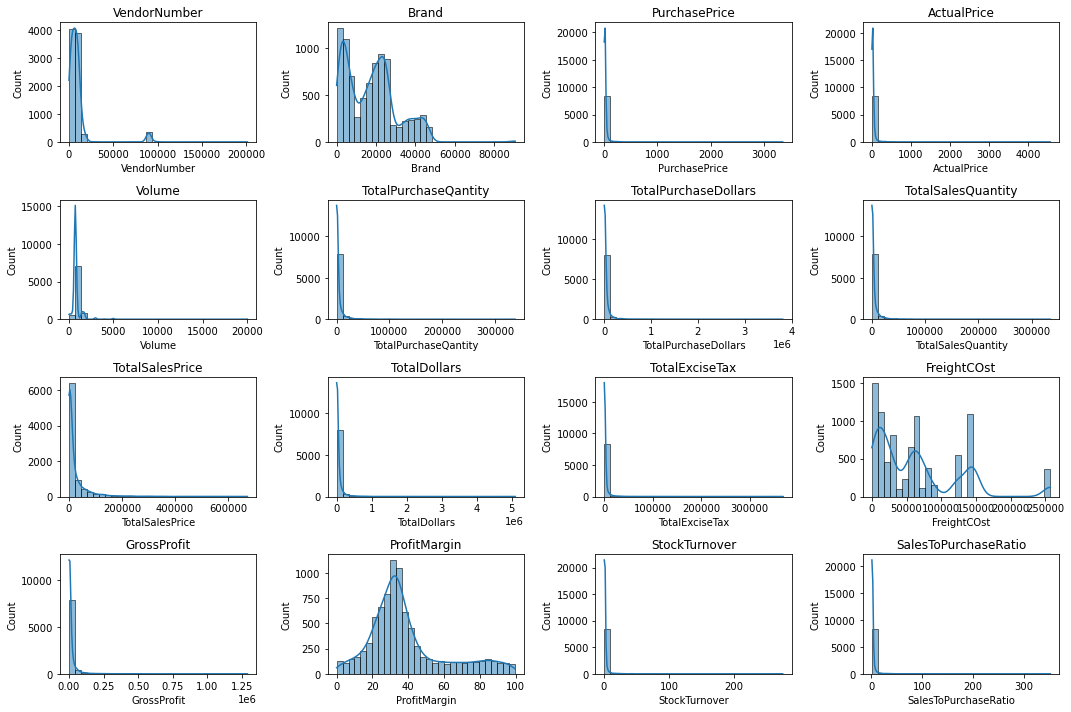

In [10]:
import numpy as np
numerical_cols = df.select_dtypes(include = np.number).columns

plt.figure(figsize=(15,10))
for i,col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)
    sns.histplot(df[col],kde = True, bins = 30)
    plt.title(col)
plt.tight_layout()
plt.show()

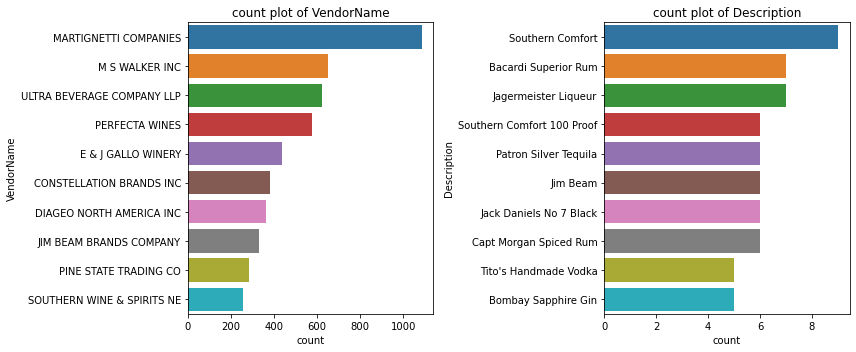

In [11]:
cat_col = ["VendorName","Description"]

plt.figure(figsize=(12,5))
for i, col in enumerate(cat_col):
    plt.subplot(1,2,i+1)
    sns.countplot(y=df[col], order=df[col].value_counts().index[:10]) #top 10 Categories
    plt.title(f"count plot of {col}")
plt.tight_layout()
plt.show()

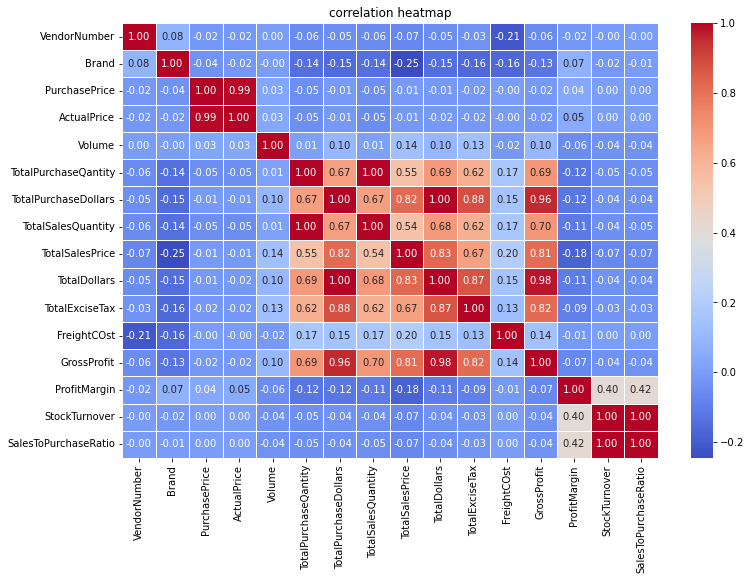

In [12]:
plt.figure(figsize=(12,8))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix,annot=True, fmt=".2f", cmap="coolwarm", linewidth= 0.5)
plt.title("correlation heatmap")
plt.show()

# Correlation Insights
- PurchasePrice has weak correlations with TotalSalesDollars (-0.012) and GrossProfit (-0.016), suggesting that price variations do not significantly impact sales revenue or profit.
- Strong correlation between total purchase quantity and total sales quantity (0.999), confirming efficient inventory turnover.
- Negative correlation between profit margin & total sales price (-0.179) suggests that as sales price increases, margins decrease, possibly due to competitive pricing pressures.
- StockTurnover has weak negative correlations with both GrossProfit (-0.038) and ProfitMargin (-0.055), indicating that faster turnover does not necessarily result in higher profitability.

# Data Analysis

**Identify Brands that needs Promotional or Pricing Adjustments which exhibit lower sales performance but higher profit margins.**

In [13]:
Brand_performance= df.groupby('Description').agg({
    'TotalDollars': 'sum',
    'ProfitMargin': 'mean'
    }).reset_index()

In [14]:
low_sales_thresold = Brand_performance['TotalDollars'].quantile(0.15)
high_profit_margin_thresold = Brand_performance['ProfitMargin'].quantile(0.85)

In [15]:
low_sales_thresold

560.299

In [16]:
high_profit_margin_thresold

64.96799999999995

In [17]:
target_brands = Brand_performance[
     ( Brand_performance['TotalDollars'] <= low_sales_thresold) &
     ( Brand_performance['ProfitMargin'] >= high_profit_margin_thresold)
 ]
print('Brands With Low Sales But High Margins:')
print(target_brands.sort_values('TotalDollars'))

Brands With Low Sales But High Margins:
                       Description  TotalDollars  ProfitMargin
6199    Santa Rita Organic Svgn Bl          9.99         66.47
2369             Debauchery Pnt Nr         11.58         65.98
2070   Concannon Glen Ellen Wh Zin         15.95         83.45
2188             Crown Royal Apple         27.86         89.81
6237  Sauza Sprklg Wild Berry Marg         27.96         82.15
...                            ...           ...           ...
5074   Nanbu Bijin Southern Beauty        535.68         76.75
2271         Dad's Hat Rye Whiskey        538.89         81.85
57       A Bichot Clos Marechaudes        539.94         67.74
6245     Sbragia Home Ranch Merlot        549.75         66.44
3326     Goulee Cos d'Estournel 10        558.87         69.43

[198 rows x 3 columns]


In [18]:
Brand_performance = Brand_performance[Brand_performance['TotalDollars']<5000]

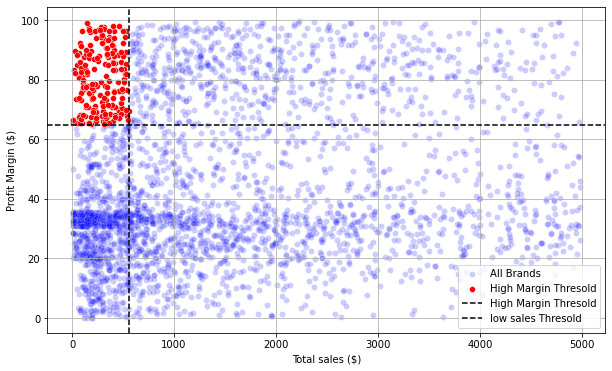

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data = Brand_performance, x ='TotalDollars', y ='ProfitMargin', color="Blue", label="All Brands", alpha=0.2)
sns.scatterplot(data = target_brands, x ='TotalDollars', y ='ProfitMargin', color="red", label="High Margin Thresold")

plt.axhline(high_profit_margin_thresold, linestyle= '--', color='black', label ="High Margin Thresold" )
plt.axvline(low_sales_thresold, linestyle= '--', color='black', label ="low sales Thresold" )

plt.xlabel('Total sales ($)')
plt.ylabel('Profit Margin ($)')
plt.legend()
plt.grid(True)
plt.show()

Which vendors and brands demonstrate the highest sales performance? II

In [20]:
def format_dollars(values):
    if values >=1_000_000:
        return f"{values/1_000_000:.2f}M"
    elif values >=1_000:
        return f"{values/1_000:.2f}k"
    else:
        return str(values)
    

In [21]:
top_vendors = df.groupby('VendorName') ["TotalDollars"].sum().nlargest(10)#top 10
top_brands = df.groupby('Description') ["TotalDollars"].sum().nlargest(10)
top_vendors

VendorName
DIAGEO NORTH AMERICA INC      67990099.42
MARTIGNETTI COMPANIES         39330359.36
PERNOD RICARD USA             32063196.19
JIM BEAM BRANDS COMPANY       31423020.46
BACARDI USA INC               24854817.14
CONSTELLATION BRANDS INC      24218745.65
E & J GALLO WINERY            18399899.46
BROWN-FORMAN CORP             18247230.65
ULTRA BEVERAGE COMPANY LLP    16502544.31
M S WALKER INC                14706458.51
Name: TotalDollars, dtype: float64

In [22]:
top_brands

Description
Jack Daniels No 7 Black    7964746.76
Tito's Handmade Vodka      7399657.58
Grey Goose Vodka           7209608.06
Capt Morgan Spiced Rum     6356320.62
Absolut 80 Proof           6244752.03
Jameson Irish Whiskey      5715759.69
Ketel One Vodka            5070083.56
Baileys Irish Cream        4150122.07
Kahlua                     3604858.66
Tanqueray                  3456697.90
Name: TotalDollars, dtype: float64

In [23]:
top_brands.apply(lambda x : format_dollars(x))

Description
Jack Daniels No 7 Black    7.96M
Tito's Handmade Vodka      7.40M
Grey Goose Vodka           7.21M
Capt Morgan Spiced Rum     6.36M
Absolut 80 Proof           6.24M
Jameson Irish Whiskey      5.72M
Ketel One Vodka            5.07M
Baileys Irish Cream        4.15M
Kahlua                     3.60M
Tanqueray                  3.46M
Name: TotalDollars, dtype: object

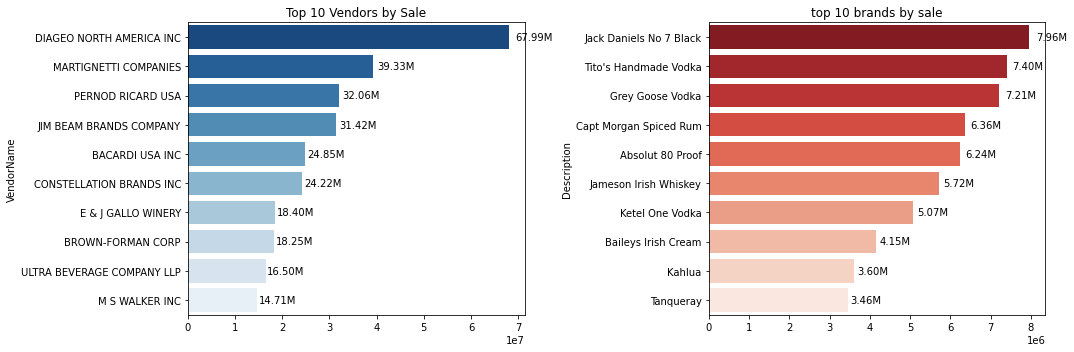

In [24]:
#plot for top vendors
plt.figure(figsize=(15, 5))

plt.subplot(1,2,1)
ax1 = sns.barplot(x=top_vendors.values, y=top_vendors.index, palette="Blues_r")
plt.title('Top 10 Vendors by Sale')

for bar in ax1.patches:
    ax1.text(
        bar.get_width() + (bar.get_width() * 0.02),   # X position
        bar.get_y() + bar.get_height() / 2,           # Y position
        format_dollars(bar.get_width()),              # Text label
        ha='left',
        va='center',                                  
        fontsize=10,
        color='black'
    )


#plot for top 10 brands

plt.subplot(1,2,2)
ax2 = sns.barplot(x = top_brands.values , y =top_brands.index, palette="Reds_r")
plt.title('top 10 brands by sale')

for bar in ax2.patches:
    ax2.text(
        bar.get_width() + (bar.get_width() * 0.02),   # X position
        bar.get_y() + bar.get_height() / 2,           # Y position
        format_dollars(bar.get_width()),              # Text label
        ha='left',
        va='center',                                  
        fontsize=10,
        color='black'
    )
    

plt.tight_layout()
plt.show()

    

**Which vendors Contribute the most to Total Purchase Dollars ?**

In [25]:
vendor_performance=df.groupby("VendorName").agg({
    "TotalPurchaseDollars":"sum",
    "GrossProfit":"sum",
    "TotalDollars":"sum"
}).reset_index()

In [26]:
vendor_performance["PurchaseContribution%"]=(vendor_performance["TotalPurchaseDollars"]/ vendor_performance["TotalPurchaseDollars"].sum())*100


In [27]:
vendor_performance = round(vendor_performance.sort_values("PurchaseContribution%", ascending= False),2)

In [28]:
top_vendors=vendor_performance.head(10)

top_vendors["TotalPurchaseDollars"] = top_vendors["TotalPurchaseDollars"].apply(format_dollars)
top_vendors["GrossProfit"] = top_vendors["GrossProfit"].apply(format_dollars)
top_vendors["TotalDollars"] = top_vendors["TotalDollars"].apply(format_dollars)

In [29]:
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalDollars,PurchaseContribution%
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,16.30
57,MARTIGNETTI COMPANIES,25.50M,13.83M,39.33M,8.30
68,PERNOD RICARD USA,23.85M,8.21M,32.06M,7.76
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,7.64
6,BACARDI USA INC,17.43M,7.42M,24.85M,5.67
20,CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,4.97
11,BROWN-FORMAN CORP,13.24M,5.01M,18.25M,4.31
30,E & J GALLO WINERY,12.07M,6.33M,18.40M,3.93
106,ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16.50M,3.63
53,M S WALKER INC,9.76M,4.94M,14.71M,3.18


In [30]:
top_vendors["PurchaseContribution%"].sum()  #65.69 percent is purchase contribution by top 10 vendors

65.69000000000001

In [31]:
top_vendors['cumulative_contribution%']= top_vendors['PurchaseContribution%'].cumsum()
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalDollars,PurchaseContribution%,cumulative_contribution%
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,16.30,16.30
57,MARTIGNETTI COMPANIES,25.50M,13.83M,39.33M,8.30,24.60
68,PERNOD RICARD USA,23.85M,8.21M,32.06M,7.76,32.36
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,7.64,40.00
6,BACARDI USA INC,17.43M,7.42M,24.85M,5.67,45.67
20,CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,4.97,50.64
11,BROWN-FORMAN CORP,13.24M,5.01M,18.25M,4.31,54.95
30,E & J GALLO WINERY,12.07M,6.33M,18.40M,3.93,58.88
106,ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16.50M,3.63,62.51
53,M S WALKER INC,9.76M,4.94M,14.71M,3.18,65.69


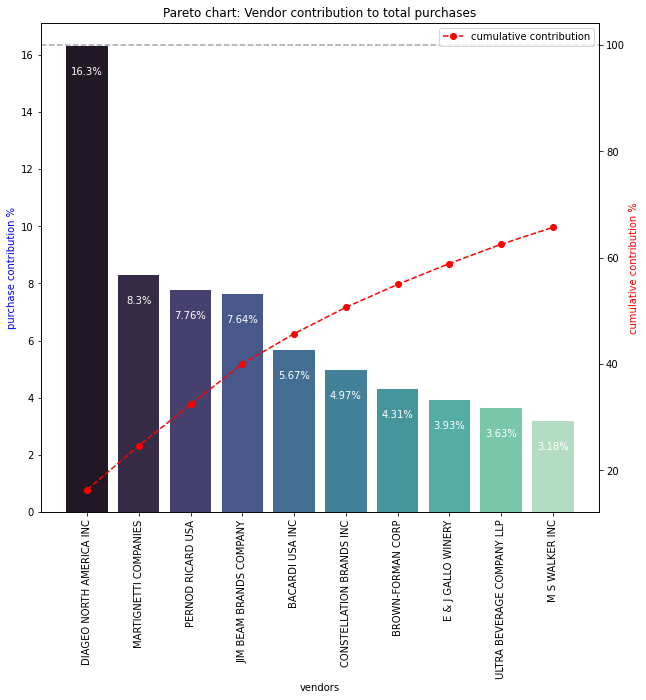

In [32]:
fig, ax1 = plt.subplots(figsize=(10,9))

sns.barplot(x= top_vendors["VendorName"], y= top_vendors['PurchaseContribution%'], palette='mako', ax=ax1 )

for i,value in enumerate(top_vendors["PurchaseContribution%"]):
    ax1.text(i, value-1, str(value)+'%',ha='center', fontsize=10, color='white') 

ax2 = ax1.twinx()
ax2.plot(top_vendors['VendorName'], top_vendors['cumulative_contribution%'], color='red', marker='o',linestyle='dashed', label='cumulative contribution')


ax1.set_xticklabels(top_vendors['VendorName'],rotation = 90)
ax1.set_ylabel('purchase contribution %',color = 'blue')
ax2.set_ylabel('cumulative contribution %' ,color = 'red')
ax1.set_xlabel('vendors')
ax1.set_title('Pareto chart: Vendor contribution to total purchases')
                                
                                
ax2.axhline(y=100, color='gray', linestyle='dashed', alpha=0.7)
ax2.legend(loc='upper right')

plt.show()

how much total procurement is dependent on top vendors

In [33]:
print(f'total purchase contribution of top 10 vendors is {round(top_vendors["PurchaseContribution%"].sum(),2)} %' )

total purchase contribution of top 10 vendors is 65.69 %


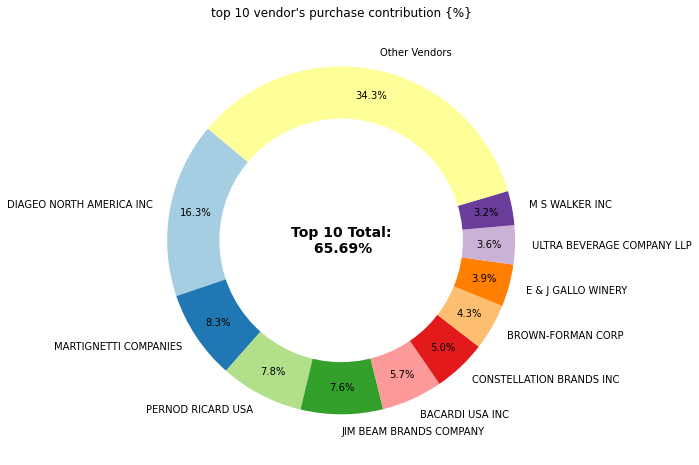

In [34]:
vendors = list(top_vendors['VendorName'].values)
purchase_contribution = list(top_vendors['PurchaseContribution%'].values)
total_contribution = sum(purchase_contribution)
remaining_contribution = 100 - total_contribution

vendors.append("Other Vendors")
purchase_contribution.append(remaining_contribution)

fig,ax = plt.subplots(figsize=(8,8))
weidge, text, autotext = ax.pie(purchase_contribution, labels=vendors, autopct='%1.1f%%',startangle=140, pctdistance=0.85, colors=plt.cm.Paired.colors)

center_circle = plt.Circle((0,0), 0.70, fc='white')
fig.gca().add_artist(center_circle)

plt.text(0,0, f"Top 10 Total:\n {total_contribution:.2f}%", fontsize=14, fontweight='bold',ha='center',va='center')

plt.title("top 10 vendor's purchase contribution {%}")
plt.show()

Does purchasing in bulk reduce the unit price, and what is the optimal purchaase cost for cost savings?

In [35]:
df['UnitPurchasePrice'] = df['TotalPurchaseDollars']/df['TotalPurchaseQantity']

In [36]:
df['OrderSize'] = pd.qcut(df['TotalPurchaseQantity'], q=3, labels=['Small','Medium','Large'])

In [37]:
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesPrice,TotalDollars,TotalExciseTax,FreightCOst,GrossProfit,ProfitMargin,StockTurnover,SalesToPurchaseRatio,UnitPurchasePrice,OrderSize
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,672819.31,5101919.51,260999.20,68601.68,1290667.91,25.30,0.98,1.34,26.27,Large
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,561512.37,4819073.49,294438.66,144929.24,1015032.27,21.06,0.98,1.27,23.19,Large
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,461140.15,4538120.60,343854.07,123780.22,1119816.92,24.68,1.00,1.33,18.24,Large
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.95,200412.0,420050.01,4475972.88,368242.80,257032.07,1214774.93,27.14,0.99,1.37,16.17,Large
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023205.99,135838.0,545778.28,4223107.62,249587.83,257032.07,1199901.63,28.41,0.98,1.40,21.89,Large
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8559,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750.0,2,2.64,5.0,10.96,15.95,0.55,27100.41,13.31,83.45,2.50,6.04,1.32,Small
8560,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,6,2.34,134.0,1.47,65.66,7.04,50293.62,63.32,96.44,22.33,28.06,0.39,Small
8561,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,50.0,2,1.48,2.0,0.99,1.98,0.10,14069.87,0.50,25.25,1.00,1.34,0.74,Small
8562,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200.0,1,1.47,72.0,77.61,143.28,15.12,257032.07,141.81,98.97,72.00,97.47,1.47,Small


In [38]:
df.groupby('OrderSize') [['UnitPurchasePrice']].mean()

,UnitPurchasePrice
OrderSize,
Small,39.068186
Medium,15.486414
Large,10.777625


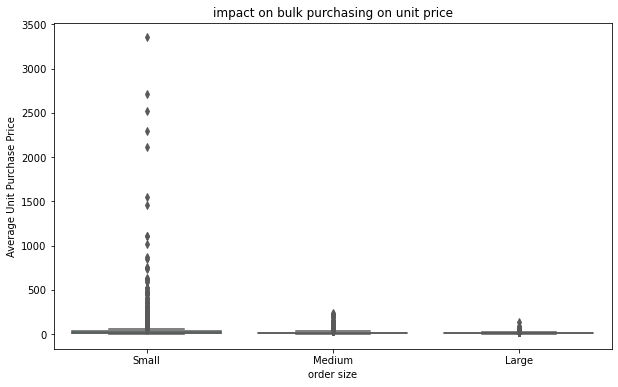

In [39]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='OrderSize', y='UnitPurchasePrice', palette='Set2')
plt.title("impact on bulk purchasing on unit price")
plt.xlabel('order size')
plt.ylabel('Average Unit Purchase Price')
plt.show()

- Vendors buying in bulk(Large Order Size) get the lowest unit price ($ 10.78 per unit), meaning higher margin if they can manage inventory efficiently
- The price difference between Small and Large is substantial(72% reduction in unit cost)
- This suggest bulk pricing successfully encourage vendors to purchase in large volumes, leading higher sales despite lower per-unit cost revenue

which vendor have low inventory turnover, Indicating excess stock and slow-moving-product?

In [40]:
df[df['StockTurnover']<1].groupby('VendorName') [['StockTurnover']].mean().sort_values('StockTurnover',ascending=True).head(10)

,StockTurnover
VendorName,
ALISA CARR BEVERAGES,0.620000
HIGHLAND WINE MERCHANTS LLC,0.710000
PARK STREET IMPORTS LLC,0.750000
Circa Wines,0.755385
KLIN SPIRITS LLC,0.760000
Dunn Wine Brokers,0.767500
CENTEUR IMPORTS LLC,0.772500
SMOKY QUARTZ DISTILLERY LLC,0.780000
TAMWORTH DISTILLING,0.800000


how much capital is locked in unsold inventory per vendor, and which vendor contribute most to it? 

In [41]:
df['UnsoldInventoryValue'] = (df['TotalPurchaseQantity']- df['TotalSalesQuantity'])* df['PurchasePrice']
print('Total unsold capital:', format_dollars(df['UnsoldInventoryValue'].sum()))

Total unsold capital: 2.71M


In [42]:
df[['UnsoldInventoryValue','VendorName']]

,UnsoldInventoryValue,VendorName
0,79624.37,BROWN-FORMAN CORP
1,87913.29,MARTIGNETTI COMPANIES
2,4870.08,PERNOD RICARD USA
3,20535.90,DIAGEO NORTH AMERICA INC
4,49712.19,DIAGEO NORTH AMERICA INC
...,...,...
8559,-3.96,WINE GROUP INC
8560,-49.92,SAZERAC CO INC
8561,0.00,HEAVEN HILL DISTILLERIES
8562,-104.37,DIAGEO NORTH AMERICA INC


In [43]:
inventory_value_per_vendor=df.groupby('VendorName') ['UnsoldInventoryValue'].sum().reset_index()

inventory_value_per_vendor=inventory_value_per_vendor.sort_values('UnsoldInventoryValue', ascending=False)
inventory_value_per_vendor['UnsoldInventoryValue']= inventory_value_per_vendor['UnsoldInventoryValue'].apply(format_dollars)
inventory_value_per_vendor.head(10)

,VendorName,UnsoldInventoryValue
25,DIAGEO NORTH AMERICA INC,722.21k
46,JIM BEAM BRANDS COMPANY,554.67k
68,PERNOD RICARD USA,470.63k
116,WILLIAM GRANT & SONS INC,401.96k
30,E & J GALLO WINERY,228.28k
79,SAZERAC CO INC,198.44k
11,BROWN-FORMAN CORP,177.73k
20,CONSTELLATION BRANDS INC,133.62k
61,MOET HENNESSY USA INC,126.48k
77,REMY COINTREAU USA INC,118.60k


What is the 95% confidence interval profit for top-performing and low-performing vendors

In [44]:
top_threshold = df['TotalDollars'].quantile(0.75)
low_threshold = df['TotalDollars'].quantile(0.25)

In [45]:
top_vendors =df[df['TotalDollars']>= top_threshold] ['ProfitMargin'].dropna()
low_vendors =df[df['TotalDollars']<= low_threshold] ['ProfitMargin'].dropna()

In [46]:
top_vendors

0       25.30
1       21.06
2       24.68
3       27.14
4       28.41
        ...  
3523    79.68
3681    85.78
4751    93.09
4920    95.01
5050    94.27
Name: ProfitMargin, Length: 2141, dtype: float64

In [47]:
def confidence_interval(data,confidence=0.95):
    mean_val = np.mean(data)
    std_err = np.std(data, ddof=1) / np.sqrt(len(data))
    t_critical = stats.t.ppf((1+confidence) / 2, df=len(data)-1)
    margin_of_err = t_critical * std_err
    return mean_val, mean_val-margin_of_err, mean_val+margin_of_err

top vendors 95% CI: 30.74,31.61, mean:31.18
low vendors 95% CI: 40.50,42.64, mean:41.57


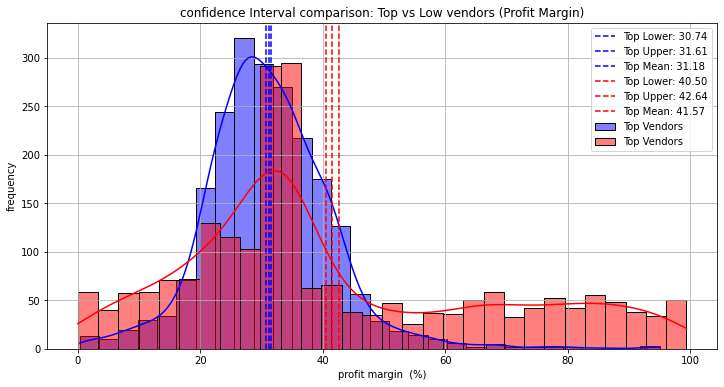

In [48]:
top_mean, top_lower, top_upper = confidence_interval(top_vendors)
low_mean, low_lower, low_upper = confidence_interval(low_vendors)

print(f"top vendors 95% CI: {top_lower:.2f},{top_upper:.2f}, mean:{top_mean:.2f}")
print(f'low vendors 95% CI: {low_lower:.2f},{low_upper:.2f}, mean:{low_mean:.2f}')
      
plt.figure(figsize=(12,6))
      
#Top vendor plot
sns.histplot(top_vendors, kde=True, color='blue', bins=30, label='Top Vendors')
plt.axvline(top_lower, color='blue', linestyle='--', label= f'Top Lower: {top_lower:.2f}')
plt.axvline(top_upper, color='blue', linestyle='--', label= f'Top Upper: {top_upper:.2f}')
plt.axvline(top_mean, color='blue', linestyle='--', label= f'Top Mean: {top_mean:.2f}')

#low vendor plot

sns.histplot(low_vendors, kde=True, color='red', bins=30, label='Top Vendors')
plt.axvline(low_lower, color='red', linestyle='--', label= f'Top Lower: {low_lower:.2f}')
plt.axvline(low_upper, color='red', linestyle='--', label= f'Top Upper: {low_upper:.2f}')
plt.axvline(low_mean, color='red', linestyle='--', label= f'Top Mean: {low_mean:.2f}')

plt.title("confidence Interval comparison: Top vs Low vendors (Profit Margin)")
plt.xlabel("profit margin  (%)")
plt.ylabel("frequency")
plt.legend()
plt.grid(True)
plt.show()

- The confidence interval fol low-performing vendors (40.48% to 42.62%) is significantly higher than that of top-performing vendors (30.74% to 31.61%).
- This suggests that vendors with lower sales tend to maintain higher profit margins, potentially due to premium pricing or lower operational costs.
- For High-Performing Vendors: If they aim to improve profitability, they could explore selective price adjustments, cost optimization, or bundling strategies.
- For Low-Performing Vendors: Despite higher margins, their Iow sales volume might indicate a need for better marketing, competitive pricing, or improved distribution strategies.

**Is there a significant difference in profit margins between top-performing and Iow-performing vendors?**

Hypothesis:

Ho (Null Hypbthesis): There is no significant difference in the mean profit margins of top-performing and low-performing vendors.
H1, (Alternative Hypothesis): The mean profit margins of top-performing and low-performing vendors are significantly different.

In [49]:
top_threshold = df['TotalDollars'].quantile(0.75)
low_threshold = df['TotalDollars'].quantile(0.25)

top_vendors =df[df['TotalDollars']>= top_threshold] ['ProfitMargin'].dropna()
low_vendors =df[df['TotalDollars']<= low_threshold] ['ProfitMargin'].dropna()

#perform two sample t-test
t_stat, p_value = ttest_ind(top_vendors, low_vendors, equal_var=False)

#print result
print(f"T-Statstic: {t_stat:.4f}, p_value: {p_value:.4f}")
      
if p_value < 0.05:
      print("Reject Ho: there is significant difference in profit margin between top and low-performing vendors.")
else:
      print("fails to reject Ho:No significant difference in profit margin")

T-Statstic: -17.6693, p_value: 0.0000
Reject Ho: there is significant difference in profit margin between top and low-performing vendors.


In [53]:
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQantity,TotalPurchaseDollars,TotalSalesQuantity,...,TotalDollars,TotalExciseTax,FreightCOst,GrossProfit,ProfitMargin,StockTurnover,SalesToPurchaseRatio,UnitPurchasePrice,OrderSize,UnsoldInventoryValue
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,...,5101919.51,260999.20,68601.68,1290667.91,25.30,0.98,1.34,26.27,Large,79624.37
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,...,4819073.49,294438.66,144929.24,1015032.27,21.06,0.98,1.27,23.19,Large,87913.29
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,...,4538120.60,343854.07,123780.22,1119816.92,24.68,1.00,1.33,18.24,Large,4870.08
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.95,200412.0,...,4475972.88,368242.80,257032.07,1214774.93,27.14,0.99,1.37,16.17,Large,20535.90
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023205.99,135838.0,...,4223107.62,249587.83,257032.07,1199901.63,28.41,0.98,1.40,21.89,Large,49712.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8559,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750.0,2,2.64,5.0,...,15.95,0.55,27100.41,13.31,83.45,2.50,6.04,1.32,Small,-3.96
8560,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,6,2.34,134.0,...,65.66,7.04,50293.62,63.32,96.44,22.33,28.06,0.39,Small,-49.92
8561,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,50.0,2,1.48,2.0,...,1.98,0.10,14069.87,0.50,25.25,1.00,1.34,0.74,Small,0.00
8562,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200.0,1,1.47,72.0,...,143.28,15.12,257032.07,141.81,98.97,72.00,97.47,1.47,Small,-104.37
